# Descripción general de la red

Importar las librerias de networkx y wntr.

In [19]:
import networkx as nx
import wntr
import numpy as np
import matplotlib.pylab as plt

Importar el archivo de la red (*.inp) y se guarda en la variable 'wn'.

In [20]:
wn = wntr.network.WaterNetworkModel('nets/Chihuahua.inp')

Detalle de la red

In [21]:
wn.describe()

{'Nodes': 1327,
 'Links': 1570,
 'Patterns': 4,
 'Curves': 11,
 'Sources': 1,
 'Controls': 0}

# Mostramos la red

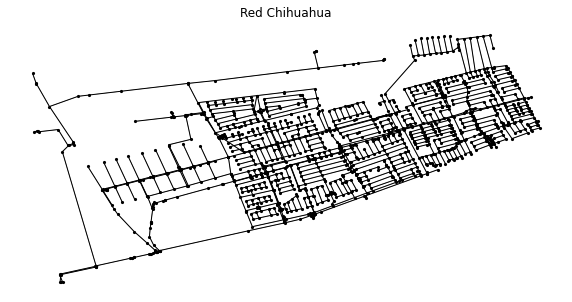

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
nodes, edges = wntr.graphics.plot_network(wn, node_size=10, title='Red Chihuahua',ax=ax1)

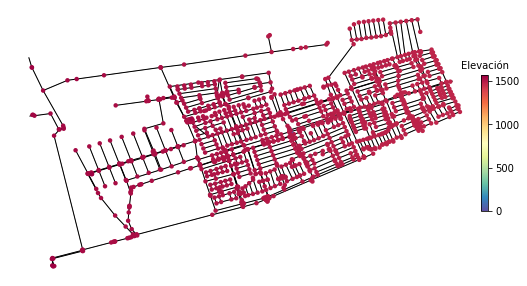

In [27]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
nodes, edges = wntr.graphics.plot_network(wn, node_attribute='elevation', node_colorbar_label='Elevación',ax=ax1)

In [5]:
pop = wntr.metrics.population(wn)
wntr.graphics.plot_interactive_network(wn, node_attribute=pop,node_range=[0,500], filename='population.html', auto_open=True)

La variable 'wn' se convierte en un multigrafo dirigido representado con la variable 'G', posteriormente se utiliza para transformarla en un multigrafo no dirigido que se representa con la variable 'uG', por último esta variable se transforma en un grafo simple represntado con la variable 'sG'.

In [3]:
G = wn.get_graph() # directed multigraph
uG = G.to_undirected() # undirected multigraph
sG = nx.Graph(uG) # undirected simple graph

Para aplicar las métricas de resiliencia topográficas requieren que la red ejemplo sea un grafo dirigido, no dirigido o simple.

Grado de nodo

In [4]:
node_degree = G.degree()
print(node_degree)

[('1', 2), ('10', 1), ('100', 2), ('103', 2), ('1037', 3), ('1038', 3), ('1039', 3), ('104', 2), ('1040', 4), ('1042', 1), ('105', 2), ('1058', 3), ('106', 2), ('107', 2), ('108', 2), ('109', 2), ('1095', 4), ('11', 3), ('110', 2), ('1105', 1), ('111', 2), ('1134', 1), ('1139', 2), ('1141', 3), ('1142', 3), ('1143', 2), ('1145', 3), ('1147', 1), ('1150', 2), ('1151', 3), ('1153', 2), ('1154', 3), ('1155', 2), ('1156', 3), ('1157', 1), ('1158', 1), ('1159', 2), ('1160', 1), ('1161', 1), ('1162', 1), ('1163', 1), ('1164', 1), ('1165', 1), ('1166', 1), ('1167', 1), ('1168', 1), ('1169', 1), ('1170', 2), ('1171', 3), ('1173', 2), ('1174', 3), ('1175', 2), ('1176', 2), ('1177', 2), ('1189', 1), ('1190', 4), ('1191', 2), ('1192', 2), ('12', 1), ('1209', 1), ('1217', 3), ('1218', 2), ('1219', 2), ('1220', 3), ('1223', 2), ('1224', 3), ('1225', 1), ('1226', 3), ('1227', 1), ('1228', 3), ('1229', 3), ('1230', 1), ('1231', 1), ('1232', 1), ('1233', 1), ('1234', 1), ('1235', 1), ('1236', 1), ('12

Nodos terminales

In [5]:
terminal_nodes = wntr.metrics.terminal_nodes(G)
print(terminal_nodes)

['n_1015', 'n_1025', 'n_1035', 'n_1045', 'n_1054', 'n_1055', 'n_1065', 'n_1075', 'n_1085', 'n_1096', 'n_1105', 'n_1115', 'n_1125', 'n_1135', 'n_1145', 'n_1155', 'n_1158', 'n_1165', 'n_1175', 'n_1185', 'n_1195', 'n_1196', 'n_1205', 'n_1215', 'n_1225', 'n_1235', 'n_1245', 'n_1252', 'n_1255', 'n_1265', 'n_1275', 'n_1285', 'n_1295', 'n_1296', 'n_130', 'n_1305', 'n_1314', 'n_1315', 'n_1318', 'n_1325', 'n_1332', 'n_1335', 'n_1345', 'n_1355', 'n_1365', 'n_1375', 'n_1381', 'n_1385', 'n_1392', 'n_1394', 'n_1395', 'n_1396', 'n_1405', 'n_1415', 'n_1418', 'n_1425', 'n_1435', 'n_1444', 'n_1445', 'n_1448', 'n_1450', 'n_1455', 'n_1463', 'n_1464', 'n_1465', 'n_1475', 'n_1485', 'n_1495', 'n_1496', 'n_1505', 'n_1513', 'n_1514', 'n_1515', 'n_1518', 'n_1519', 'n_1525', 'n_1529', 'n_153', 'n_1535', 'n_1542', 'n_1543', 'n_1545', 'n_1555', 'n_1565', 'n_1575', 'n_1585', 'n_1586', 'n_1587', 'n_1590', 'n_1591', 'n_1596', 'n_1605', 'n_1615', 'n_1622', 'n_1625', 'n_1635', 'n_1645', 'n_1648', 'n_1649', 'n_165', 'n

Densidad de enlaces

In [6]:
link_density = nx.density(G)
print(link_density)

0.0005068869840009771


Diámetro

In [7]:
diameter = nx.diameter(uG)
print(diameter)

134


Excentricidad

In [8]:
eccentricity = nx.eccentricity(uG)
print(eccentricity)

{'n_1': 76, 'n_10': 75, 'n_100': 74, 'n_1000': 73, 'n_1001': 72, 'n_1002': 71, 'n_1003': 70, 'n_1004': 69, 'n_1005': 100, 'n_1006': 70, 'n_1007': 71, 'n_1008': 72, 'n_1009': 73, 'n_101': 74, 'n_1010': 75, 'n_1011': 76, 'n_1012': 106, 'n_1013': 107, 'n_1014': 108, 'n_1015': 100, 'n_1016': 109, 'n_1017': 110, 'n_1018': 68, 'n_1019': 69, 'n_102': 68, 'n_1020': 80, 'n_1021': 81, 'n_1022': 82, 'n_1023': 83, 'n_1024': 84, 'n_1025': 100, 'n_1026': 85, 'n_1027': 86, 'n_1028': 87, 'n_1029': 88, 'n_103': 89, 'n_1030': 90, 'n_1031': 92, 'n_1032': 93, 'n_1033': 94, 'n_1034': 95, 'n_1035': 99, 'n_1036': 96, 'n_1037': 97, 'n_1038': 99, 'n_1039': 100, 'n_104': 101, 'n_1040': 102, 'n_1041': 103, 'n_1043': 104, 'n_1044': 106, 'n_1045': 99, 'n_1046': 107, 'n_1047': 108, 'n_1048': 109, 'n_1049': 110, 'n_105': 111, 'n_1050': 112, 'n_1051': 113, 'n_1052': 114, 'n_1053': 115, 'n_1054': 116, 'n_1055': 96, 'n_1056': 82, 'n_1057': 81, 'n_1058': 80, 'n_1059': 79, 'n_106': 78, 'n_1060': 77, 'n_1061': 76, 'n_1062

Centralidad de intermediación

In [9]:
betweenness_centrality = nx.betweenness_centrality(sG)
print(betweenness_centrality)

{'n_1': 0.04666104128732365, 'n_10': 0.04744229091424831, 'n_100': 0.04822592822340683, 'n_1000': 0.04901195321479924, 'n_1001': 0.049799888351978745, 'n_1002': 0.050589256098498576, 'n_1003': 0.0513791013814652, 'n_1004': 0.052168946664431816, 'n_1005': 0.002323226183478021, 'n_1006': 0.052958791947398436, 'n_1007': 0.05374863723036504, 'n_1008': 0.05453848251333166, 'n_1009': 0.05532832779629827, 'n_101': 0.05611817307926488, 'n_1010': 0.06127520059316398, 'n_1011': 0.24913275990963607, 'n_1012': 0.06922583223858103, 'n_1013': 0.02096695400034669, 'n_1014': 0.02005151663187814, 'n_1015': 0.0, 'n_1016': 0.019137034336303132, 'n_1017': 0.018665467095112367, 'n_1018': 0.1260950507645122, 'n_1019': 0.0444999103027374, 'n_102': 0.04903113426207807, 'n_1020': 0.1499273428296231, 'n_1021': 0.14910884535984997, 'n_1022': 0.14828939281718329, 'n_1023': 0.14746898520162305, 'n_1024': 0.14664762251316926, 'n_1025': 0.0, 'n_1026': 0.14582530475182193, 'n_1027': 0.14500203191758104, 'n_1028': 0.1

Centralidad de cercanía

In [10]:
closeness_centrality = nx.closeness_centrality(G)
print(closeness_centrality)

{'n_1': 0.0007327796775769418, 'n_10': 0.0007816316560820713, 'n_100': 0.0008141996417521575, 'n_1000': 0.0008374624886593621, 'n_1001': 0.0008549096238397655, 'n_1002': 0.000868479617868968, 'n_1003': 0.0008793356130923302, 'n_1004': 0.0008882177910023537, 'n_1005': 0.0012834747079984012, 'n_1006': 0.0008956196059273733, 'n_1007': 0.0009018826800946977, 'n_1008': 0.0009072510293809756, 'n_1009': 0.0009119035987624165, 'n_101': 0.0009159745969711773, 'n_1010': 0.0009195666542142015, 'n_1011': 0.005009093144225035, 'n_1012': 0.0016774100292138558, 'n_1013': 0.0016217255159489696, 'n_1014': 0.0015696193014341478, 'n_1015': 0.0, 'n_1016': 0.0015207572094217854, 'n_1017': 0.0021126589743275417, 'n_1018': 0.000651359713401726, 'n_1019': 0.0007327796775769418, 'n_102': 0.001255663021652757, 'n_1020': 0.0008141996417521575, 'n_1021': 0.0008374624886593621, 'n_1022': 0.0008549096238397655, 'n_1023': 0.000868479617868968, 'n_1024': 0.0008793356130923302, 'n_1025': 0.0010991695163654128, 'n_1026

Puntos de articulación

In [11]:
articulation_points = list(nx.articulation_points(uG))
print(articulation_points)

['Tanque_Sup_Filtros_(FS)', 'n_1067', 'n_1066', 'n_1064', 'n_1063', 'n_1992', 'n_108', 'n_1080', 'n_1081', 'n_1082', 'n_1083', 'n_1084', 'n_1086', 'n_1087', 'n_1088', 'n_1089', 'n_109', 'n_1090', 'n_1091', 'n_1092', 'n_1093', 'n_1094', 'n_1097', 'n_1098', 'n_1099', 'n_11', 'n_110', 'n_1100', 'n_1101', 'n_1102', 'n_1103', 'n_1104', 'n_1584', 'n_1583', 'n_1582', 'n_1581', 'n_1580', 'n_158', 'n_1579', 'n_1578', 'n_1577', 'n_1576', 'n_1574', 'n_1573', 'n_1572', 'n_1571', 'n_1562', 'n_1068', 'n_1069', 'n_107', 'n_1070', 'n_1071', 'n_1072', 'n_1073', 'n_1074', 'n_1076', 'n_1077', 'n_1078', 'n_1079', 'n_1154', 'n_1156', 'n_1157', 'n_1160', 'n_331', 'n_1416', 'n_330', 'n_1414', 'n_1413', 'n_1412', 'n_337', 'n_338', 'n_1411', 'n_1161', 'n_1162', 'n_1417', 'n_1163', 'n_1164', 'n_1166', 'n_1167', 'n_495', 'n_1053', 'n_1052', 'n_1051', 'n_1050', 'n_105', 'n_1049', 'n_1048', 'n_1047', 'n_1046', 'n_1044', 'n_1244', 'n_1570', 'n_1037', 'n_1036', 'n_1034', 'n_1033', 'n_1032', 'n_1031', 'n_1030', 'n_10

Puentes

In [12]:
bridges = wntr.metrics.bridges(G)
print(bridges)

['T9', 'T21', 'T28', 'T378', 'V2', 'T29', 'T30', 'T31', 'T1512', 'T32', 'T33', 'T34', 'T35', 'T36', 'T37', 'T38', 'T1036', 'T39', 'T40', 'T41', 'T42', 'T43', 'T44', 'T51', 'T283', 'T1518', 'T52', 'T53', 'T54', 'T55', 'T56', 'T57', 'T58', 'T59', 'T60', 'T61', 'T62', 'T63', 'T973', 'T64', 'T65', 'T66', 'V3', 'T67', 'T68', 'T70', 'T71', 'T72', 'T1526', 'T73', 'T74', 'T991', 'T75', 'T76', 'T1011', 'T77', 'T78', 'T79', 'T80', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86', 'T87', 'T89', 'T90', 'T1024', 'T91', 'T92', 'T93', 'T94', 'T95', 'T1552', 'T96', 'T97', 'T98', 'T99', 'T100', 'T101', 'T102', 'T103', 'T104', 'T105', 'T106', 'T446', 'T1113', 'T107', 'T108', 'T109', 'T110', 'T111', 'T112', 'T113', 'V4', 'T114', 'T115', 'T116', 'T1038', 'T117', 'T633', 'T1556', 'T118', 'T119', 'T1049', 'T120', 'T121', 'T122', 'T123', 'T124', 'T125', 'T126', 'T1640', 'T127', 'T128', 'T129', 'T130', 'T131', 'T132', 'T133', 'T134', 'T136', 'T135', 'T1063', 'T137', 'T138', 'T1083', 'T139', 'T140', 'T1639', 'T141', '

Longitudes de ruta más cortas

In [13]:
shortest_path_length = nx.shortest_path_length(uG)
print(shortest_path_length)

<generator object all_pairs_shortest_path_length at 0x000001B65CD92C10>


Longitud de ruta más corta promedio

In [14]:
ave_shortest_path_length = nx.average_shortest_path_length(uG)
print(ave_shortest_path_length)

43.09439642998901


Rutas entre dos nodos en un gráfico ponderado, donde el gráfico se pondera según la dirección del flujo de una simulación hidráulica

In [15]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
flowrate = results.link['flowrate']
G = wn.get_graph(link_weight=flowrate)
all_paths = nx.all_simple_paths(G, '1', '5')
print(all_paths)

<generator object _all_simple_paths_multigraph at 0x000001B65CD92740>


Métricas hidráulicas, estás requieren de la simulación hidráulica de la red.

Nodos y momentos en los que la presión supera un umbral, utilizando los resultados de una simulación hidráulica.

In [16]:
wn.options.hydraulic.demand_model = 'PDD'
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

RuntimeError: Simulation did not converge. Reached maximum number of iterations: 2999

In [22]:
pressure = results.node['pressure']
threshold = 21.09 # 30 psi
pressure_above_threshold = wntr.metrics.query(pressure, np.greater,threshold)
print (pressure_above_threshold)

name     n_1  n_10  n_100  n_1000  n_1001  n_1002  n_1003  n_1004  n_1005  \
0       True  True   True   False   False   False   False   False    True   
3600    True  True   True    True    True    True    True    True    True   
7200    True  True   True    True    True    True    True    True    True   
10800   True  True   True    True    True    True    True    True    True   
14400   True  True   True    True   False   False   False   False    True   
...      ...   ...    ...     ...     ...     ...     ...     ...     ...   
590400  True  True  False   False   False   False   False   False    True   
594000  True  True  False   False   False   False   False   False    True   
597600  True  True  False   False   False   False   False   False    True   
601200  True  True  False   False   False   False   False   False    True   
604800  True  True   True    True    True   False   False   False    True   

name    n_1006  ...  n_998      1  Potabilizadora_(FS)  \
0        False  .

Disponibilidad de servicio de agua

In [23]:
expected_demand = wntr.metrics.expected_demand(wn)
demand = results.node['demand']
wsa = wntr.metrics.water_service_availability(expected_demand, demand)
print(expected_demand)
print(demand)
print(wsa)

          n_1  n_10  n_100  n_1000  n_1001  n_1002  n_1003  n_1004    n_1005  \
0.0       0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000206   
3600.0    0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000210   
7200.0    0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000216   
10800.0   0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000217   
14400.0   0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000222   
...       ...   ...    ...     ...     ...     ...     ...     ...       ...   
590400.0  0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000307   
594000.0  0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000267   
597600.0  0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000242   
601200.0  0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000222   
604800.0  0.0   0.0    0.0     0.0     0.0     0.0     0.0     0.0  0.000206   

          n_1006  ...      n_99     n_9

## Indice de Todini

In [24]:
head = results.node['head']
pump_flowrate = results.link['flowrate'].loc[:,wn.pump_name_list]
todini = wntr.metrics.todini_index(head, pressure, demand, pump_flowrate, wn,threshold)
print(head)
print(pump_flowrate)
print(todini)

name            n_1         n_10        n_100       n_1000       n_1001  \
0       1237.631958  1237.961548  1238.277710  1238.483643  1238.772583   
3600    1277.427124  1277.455933  1277.483765  1277.501831  1277.527100   
7200    1277.882935  1277.911743  1277.939453  1277.957642  1277.982910   
10800   1277.164185  1277.193115  1277.220825  1277.238770  1277.264160   
14400   1239.061768  1240.052490  1241.002930  1241.621948  1242.490601   
...             ...          ...          ...          ...          ...   
590400  1235.991699  1235.991699  1235.991699  1235.991699  1235.991699   
594000  1237.204224  1237.204224  1237.204224  1237.204224  1237.204224   
597600  1237.191284  1237.220459  1237.248535  1237.266724  1237.292358   
601200  1237.357910  1237.386963  1237.415039  1237.433350  1237.458862   
604800  1247.120728  1247.149658  1247.177490  1247.195679  1247.221191   

name         n_1002       n_1003       n_1004       n_1005       n_1006  ...  \
0       1238.940674